In [ ]:
import tensorflow as tf
import os
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import shutil
from tqdm.auto import tqdm

In [ ]:
!unzip -q /content/drive/MyDrive/train.zip

In [ ]:
#!rm -rf /content/train

<ipython-input-5-7652a2bcbb94>:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(5,5,c)


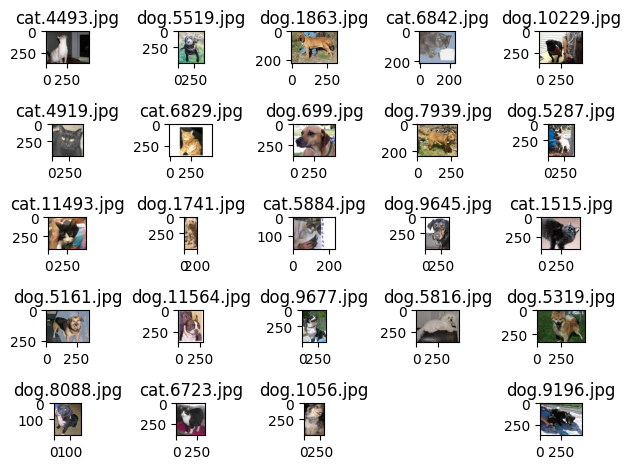

In [ ]:
d = np.random.choice(os.listdir('/content/train'),25,replace  = True)
c = 1
for i in d:
  image = cv2.imread(os.path.join('/content/train',i))
  image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
  plt.subplot(5,5,c)
  plt.imshow(image)
  plt.tight_layout()
  plt.title(i)
  c+=1
plt.show()

In [ ]:
!mkdir images
!mkdir images/cats
!mkdir images/dogs

In [ ]:
source = '/content/train/'
dest_dog = '/content/images/cats/'
dest_cat = '/content/images/dogs/'

In [ ]:
for i in tqdm(os.listdir('/content/train')):
  if i.startswith('dog'):
    shutil.copy(source + i,dest_dog)
  else:
    shutil.copy(source + i,dest_cat)

  0%|          | 0/25000 [00:00<?, ?it/s]

In [ ]:
len(os.listdir(dest_dog)),len(os.listdir(dest_cat))

(12500, 12500)

In [ ]:
!rm -rf train

In [ ]:
dogg = np.random.choice(os.listdir(dest_dog),500,replace = False)
caat = np.random.choice(os.listdir(dest_cat),500,replace = False)

In [ ]:
pd.Series(dogg).duplicated().sum()

0

In [ ]:
len(set(dogg))

500

In [ ]:
!mkdir test

In [ ]:
for i in dogg:
  shutil.move(dest_dog + i,'/content/test')
for i in caat:
  shutil.move(dest_cat + i,'/content/test')
len(os.listdir(dest_dog)),len(os.listdir(dest_cat)),len(os.listdir('/content/test'))

(12000, 12000, 1000)

In [ ]:
idg = tf.keras.preprocessing.image.ImageDataGenerator(rotation_range=60,
                                                      width_shift_range=0.2,
                                                      height_shift_range=0.2,
                                                      horizontal_flip = True,
                                                      vertical_flip = True,
                                                      rescale = 1/255,
                                                      validation_split=0.1)

In [ ]:
bs = 64

In [ ]:
train = idg.flow_from_directory('/content/images',
                                target_size = (150,150),
                                batch_size=bs,
                                shuffle = True,
                                subset = 'training')

Found 21600 images belonging to 2 classes.


In [ ]:
val = idg.flow_from_directory('/content/images',
                             target_size = (150,150),
                             batch_size = bs,
                             shuffle = True,
                             subset = 'validation')

Found 2400 images belonging to 2 classes.


In [ ]:
#del model

In [ ]:
model = tf.keras.models.Sequential(name = 'Dog_vs_Cat')

In [ ]:
model.add(tf.keras.layers.InputLayer((150,150,3),batch_size = bs,name = 'Input_Layer'))
model.add(tf.keras.layers.Flatten(name = 'Flatten'))
model.add(tf.keras.layers.Dense(128,activation = 'relu',name = 'Hidden_layer1'))
model.add(tf.keras.layers.Dense(64,activation = 'relu',name = 'Hidden_layer2'))
model.add(tf.keras.layers.Dense(2,activation = 'Softmax',name = 'Output_layer'))

In [ ]:
model.summary()

Model: "Dog_vs_Cat"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Flatten (Flatten)           (64, 67500)               0         
                                                                 
 Hidden_layer1 (Dense)       (64, 128)                 8640128   
                                                                 
 Hidden_layer2 (Dense)       (64, 64)                  8256      
                                                                 
 Output_layer (Dense)        (64, 2)                   130       
                                                                 
Total params: 8648514 (32.99 MB)
Trainable params: 8648514 (32.99 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


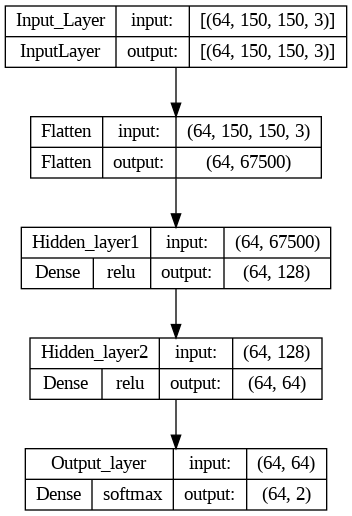

In [ ]:
tf.keras.utils.plot_model(model,show_shapes=True,show_layer_names=True,show_layer_activations=True)

In [ ]:
model.compile(optimizer = tf.keras.optimizers.SGD(),
              loss = tf.keras.losses.categorical_crossentropy,
              metrics = 'accuracy')

In [ ]:
model.fit(train,batch_size = bs,epochs = 15,validation_data = val,shuffle = True)

Epoch 1/15
338/338 [==============================] - 166s 487ms/step - loss: 0.7270 - accuracy: 0.5260 - val_loss: 0.6963 - val_accuracy: 0.5233
Epoch 2/15
338/338 [==============================] - 160s 473ms/step - loss: 0.6875 - accuracy: 0.5477 - val_loss: 0.6928 - val_accuracy: 0.5442
Epoch 3/15
338/338 [==============================] - 163s 484ms/step - loss: 0.6815 - accuracy: 0.5666 - val_loss: 0.6767 - val_accuracy: 0.5746
Epoch 4/15
338/338 [==============================] - 162s 479ms/step - loss: 0.6796 - accuracy: 0.5624 - val_loss: 0.6758 - val_accuracy: 0.5738
Epoch 5/15
338/338 [==============================] - 162s 479ms/step - loss: 0.6766 - accuracy: 0.5774 - val_loss: 0.6753 - val_accuracy: 0.5704
Epoch 6/15
338/338 [==============================] - 163s 482ms/step - loss: 0.6767 - accuracy: 0.5694 - val_loss: 0.6756 - val_accuracy: 0.5783
Epoch 7/15
338/338 [==============================] - 167s 493ms/step - loss: 0.6752 - accuracy: 0.5709 - val_loss: 0.6849 -

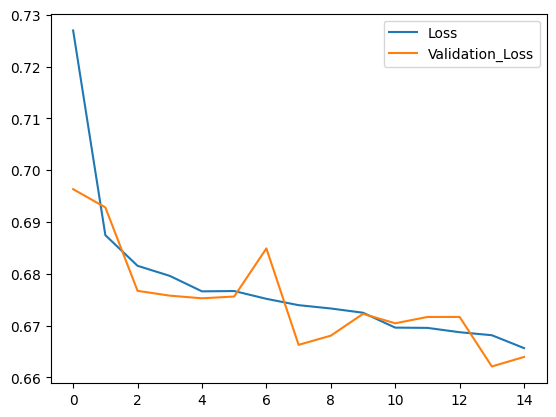

In [ ]:
plt.plot(model.history.history['loss'],label = 'Loss')
plt.plot(model.history.history['val_loss'],label = 'Validation_Loss')
plt.legend()
plt.show()

In [ ]:
del model

In [ ]:
model = tf.keras.models.Sequential(name = 'Dog_vs_Cat_CNN')

In [ ]:
model.add(tf.keras.layers.InputLayer((150,150,3),name = 'Input_Layer'))

#Chunk1:
model.add(tf.keras.layers.Conv2D(16,
                                 kernel_size=(3,3),
                                 strides=(1,1),
                                 activation = 'relu',
                                 padding = 'valid',
                                 name = 'Conv1'))
#output shape = (150-3+1)/1 = 148 => (148,148,16)

model.add(tf.keras.layers.MaxPool2D(pool_size = (2,2),
                                    strides = (2,2),
                                    padding='valid',
                                    name = 'Pool1'))
#output shape = (148-2+2)/2 = 74 => (74,74,16)

#Chunk2:
model.add(tf.keras.layers.Conv2D(32,
                                 kernel_size=(3,3),
                                 strides = (1,1),
                                 activation = 'relu',
                                 padding = 'valid',
                                 name = 'Conv2'))
#output shape = (74-3+1)/1 = 72 => (72,72,32)

model.add(tf.keras.layers.MaxPool2D(pool_size = (2,2),
                                    strides = (2,2),
                                    padding = 'valid',
                                    name = 'Pool2'))
#output shape = (72-2+2)/2 = 36 => (36,36,32)

#Chunk3:
model.add(tf.keras.layers.Conv2D(32,
                             kernel_size = (3,3),
                             strides = (1,1),
                              activation='relu',
                             padding = 'valid',
                              name = 'Conv3'))
#output shape = (36-3+1)/1 = 34 => (34,34,32)

model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2),
                                    strides = (2,2),
                                    padding = 'valid',
                                    name = 'Pool3'))
#output shape = (34-2+2)/2 = 17 => (17,17,32)

model.add(tf.keras.layers.Flatten(name = 'Flatten'))
model.add(tf.keras.layers.Dense(64,activation = 'relu',name = 'Hidden_Layer1'))
model.add(tf.keras.layers.Dense(32,activation = 'relu',name = 'Hidden_Layer2'))
model.add(tf.keras.layers.Dense(2,activation = 'softmax',name = 'Output_layer'))

In [ ]:
model.summary()

Model: "Dog_vs_Cat_CNN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Conv1 (Conv2D)              (None, 148, 148, 16)      448       
                                                                 
 Pool1 (MaxPooling2D)        (None, 74, 74, 16)        0         
                                                                 
 Conv2 (Conv2D)              (None, 72, 72, 32)        4640      
                                                                 
 Pool2 (MaxPooling2D)        (None, 36, 36, 32)        0         
                                                                 
 Conv3 (Conv2D)              (None, 34, 34, 32)        9248      
                                                                 
 Pool3 (MaxPooling2D)        (None, 17, 17, 32)        0         
                                                                 
 Flatten (Flatten)           (None, 9248)           

In [ ]:
model.compile(optimizer=tf.keras.optimizers.SGD(),
              loss = tf.keras.losses.categorical_crossentropy,
              metrics = 'accuracy')

In [ ]:
model.fit(train,batch_size=bs,epochs = 15,validation_data=val,shuffle = True)

Epoch 1/15
338/338 [==============================] - 172s 503ms/step - loss: 0.6888 - accuracy: 0.5396 - val_loss: 0.6814 - val_accuracy: 0.5383
Epoch 2/15
338/338 [==============================] - 167s 495ms/step - loss: 0.6762 - accuracy: 0.5737 - val_loss: 0.6736 - val_accuracy: 0.5779
Epoch 3/15
338/338 [==============================] - 167s 495ms/step - loss: 0.6646 - accuracy: 0.5909 - val_loss: 0.6540 - val_accuracy: 0.5962
Epoch 4/15
338/338 [==============================] - 170s 503ms/step - loss: 0.6599 - accuracy: 0.5965 - val_loss: 0.6623 - val_accuracy: 0.5908
Epoch 5/15
338/338 [==============================] - 169s 501ms/step - loss: 0.6549 - accuracy: 0.6052 - val_loss: 0.6454 - val_accuracy: 0.6237
Epoch 6/15
338/338 [==============================] - 166s 491ms/step - loss: 0.6487 - accuracy: 0.6109 - val_loss: 0.6322 - val_accuracy: 0.6404
Epoch 7/15
338/338 [==============================] - 168s 498ms/step - loss: 0.6418 - accuracy: 0.6218 - val_loss: 0.6216 -

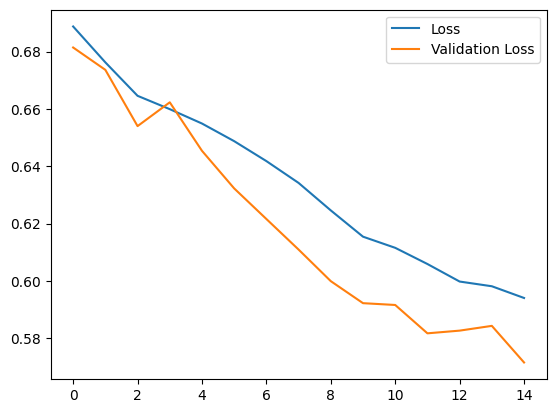

In [ ]:
plt.plot(model.history.history['loss'],label = 'Loss')
plt.plot(model.history.history['val_loss'],label = 'Validation Loss')
plt.legend()
plt.show()

In [ ]:
ytest = []
for i in os.listdir('/content/test'):
  if 'dog.' in i:
    ytest.append('Dog')
  if 'cat.' in i:
    ytest.append('Cat')

Cat    500
Dog    500
dtype: int64

In [ ]:
train.class_indices

{'cats': 0, 'dogs': 1}

In [ ]:
ypred = []
def image_pred(test):
  for i in tqdm(os.listdir(test)):
    test_image = cv2.imread(os.path.join(test,i))
    test_image = cv2.cvtColor(test_image,cv2.COLOR_BGR2RGB)
    test_image = cv2.resize(test_image,(150,150))
    test_image = np.expand_dims(test_image,axis = 0)
    t = model.predict(test_image,verbose = 0)
    t = pd.DataFrame(t)
    '''if t[0][0] > t[1][0]:
      ypred.append('Cat')
    if t[0][0] < t[1][0]:
      ypred.append('Dog')'''
    return t

In [ ]:
image_pred('/content/test')

  0%|          | 0/1000 [00:00<?, ?it/s]

,0,1
0,1.0,0.0


In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score,ConfusionMatrixDisplay

In [ ]:
m = confusion_matrix(ytest,ypred)

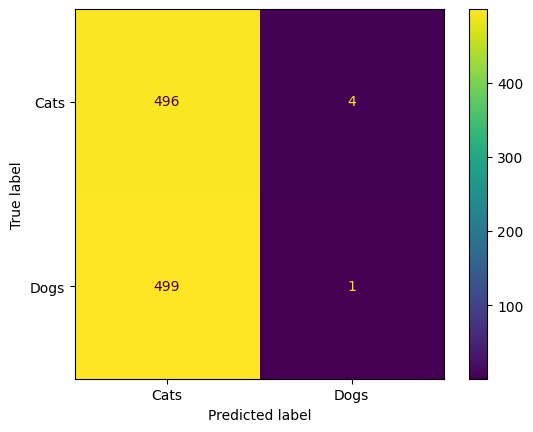

In [ ]:
ConfusionMatrixDisplay(m,display_labels = ['Cats','Dogs']).plot()

In [ ]:
accuracy_score(ytest,ypred)

0.497

In [ ]:
pred = pd.DataFrame([ytest,ypred])
pred.T

,0,1
0,Cat,Cat
1,Cat,Cat
2,Cat,Cat
3,Cat,Cat
4,Dog,Cat
...,...,...
995,Dog,Cat
996,Dog,Cat
997,Cat,Cat
998,Cat,Cat
